<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2023/blob/main/Regression_Recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# --- UNDER CONSTRUCTION! ---

# TO DO
* MLP
* More links to documentation


**Dr. Daugherity, PHYS 453, Spring 2023**

# Regression Recipe
This notebook will give you basic outline for regression using best practices and more advanced tools from sklearn. 

**NOTE** Skipping all of the teaching and discussion, just skipping straight to the code.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Common utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import PredictionErrorDisplay

# Regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Data
For resources about checking, cleaning, and preprocessing data see my Classifier Recipe.

In [2]:
X,y = datasets.load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print('Train\t',X_train.shape)
print('Test\t',X_test.shape)

Train	 (353, 10)
Test	 (89, 10)


In [38]:
# Get feature names to use later
data = datasets.load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [39]:
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# Helper Functions

In [17]:
# A custom version of PredictionErrorDisplay 
def make_regression_plot(reg):
  plt.plot(reg.predict(X_train), y_train, 'bo', alpha=0.2, label='Train')
  plt.plot(reg.predict(X_test), y_test, 'ro', alpha=0.8, label='Test')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.gca().set_aspect('equal') # square aspect ratio
  plt.legend()
  plt.grid()

In [76]:
# These functions visualize results from a parameter grid search. 

def make_grid_plot_labels(grid):
  # Turns a parameter dictionary entry into a single string.  Not elegant.  
  res = grid.cv_results_  
  NUM_KEYS = len(res['params'][0].values())
  labels = []
  for item in res['params']:
    s = ""
    for val in item.values():
      s+= str(val)
      s+='_'
    labels.append(s[:-1])
  return labels

def make_grid_plot(grid):
  # Displays the scores for every set of parameters
  res = grid.cv_results_  
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  plt.axvline(grid.best_index_, color='black', lw=2) # draw black line behind best params
  plt.plot(res['mean_test_score'],'-o', label='Validaiton')
  plt.plot(res['mean_train_score'],'-s', label='Train')
  plt.title('Grid CV Results')
  plt.ylabel('Mean Test Score')
  NUM_KEYS = len(res['params'])
  labels = make_grid_plot_labels(grid)
  plt.xticks(ticks = np.arange(NUM_KEYS), labels=labels, rotation=90)
  plt.legend()
  plt.grid()
  
  plt.subplot(1,2,2)
  plt.plot(grid.predict(X_train), y_train, 'bo', alpha=0.2, label='Train')
  plt.plot(grid.predict(X_test), y_test, 'ro', alpha=0.8, label='Test')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.gca().set_aspect('equal') # square aspect ratio
  plt.legend()
  plt.grid()
  
  plt.tight_layout()
  plt.show()

In [7]:
scores = dict()  # set up a variable to store the final scores

# Linear Models

## Linear Regression
Zero parameters to fit, no grid search.  

In [91]:
estimators = [('scaler', StandardScaler()), ('reg', LinearRegression() ) ]
pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

print(f"Train Score:\t{pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{pipe.score(X_test,y_test):0.3f}")

scores['LinearRegression'] = pipe.score(X_test,y_test)

Train Score:	0.554
Test Score:	0.332


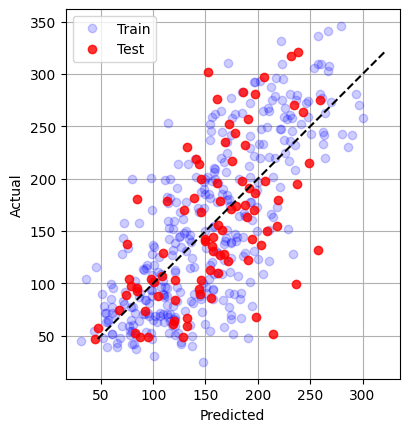

In [92]:
make_regression_plot(pipe)

## RidgeCV

RidgeCV uses built-in cross-val.

In [22]:
estimators = [('scaler', StandardScaler()), ('reg', RidgeCV() ) ]
pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

print(f"Train Score:\t{pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{pipe.score(X_test,y_test):0.3f}")

scores['RidgeCV'] = pipe.score(X_test,y_test)

Train Score:	0.552
Test Score:	0.331


In [20]:
print(pipe[-1].coef_)
print(pipe[-1].intercept_)

print(pipe[-1].alpha_)
print(pipe[-1].best_score_)

[ -1.39348359 -11.08918803  27.23428311  13.94227599  -9.16658869
  -1.89356091  -8.53161229   5.47161054  26.37484651   2.56980585]
151.60623229461757
10.0
-2898.8495429074837


## Lasso

Lasso can perform $L_1$ based feature selection, see: https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection



In [31]:
estimators = [('scaler', StandardScaler()), ('reg', LassoCV() ) ]
pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

print(f"Train Score:\t{pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{pipe.score(X_test,y_test):0.3f}")

scores['LassoCV'] = pipe.score(X_test,y_test)

Train Score:	0.552
Test Score:	0.330


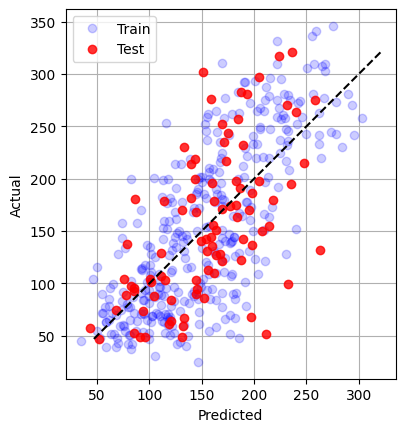

In [34]:
make_regression_plot(pipe)

In [33]:
print(pipe[-1].coef_)  
print(pipe[-1].intercept_)

print(pipe[-1].alpha_)

[ -0.94727812 -10.74389633  27.74231615  13.531308   -10.50667539
  -0.          -8.51902342   3.66178658  28.07857011   1.84131351]
151.60623229461757
0.41737794212886964


Notice that one of the coefficients is set to 0

# Support Vector
Options are SVR, NuSVR, and LinearSVR

User's Guide: https://scikit-learn.org/stable/modules/svm.html#regression

Example: 
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py


Grid Parameters: {'reg__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
Best parameters: {'reg__kernel': 'linear'}
Best Train Score:	0.509
Grid Test Score:	0.332


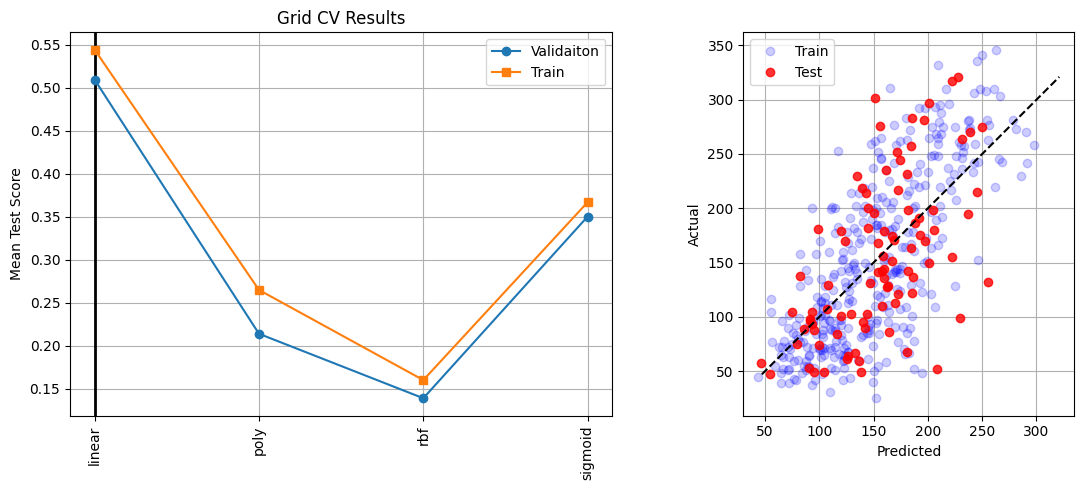

In [93]:
# Define Pipeline
estimators = [('scaler', StandardScaler()), ('reg', SVR() ) ]
pipe = Pipeline(estimators)

# Grid Search Parameters
params = {'reg__kernel':['linear', 'poly', 'rbf', 'sigmoid']  }
print('Grid Parameters:',params)

grid = GridSearchCV(pipe, param_grid=params, return_train_score=True)
grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
print(f"Best Train Score:\t{grid.best_score_:0.3f}")
print(f"Grid Test Score:\t{grid.score(X_test,y_test):0.3f}")

make_grid_plot(grid) # Plot the results

scores['SVR'] = grid.score(X_test,y_test)

# Nearest Neighbors

User's Guide: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression

API: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

Notes:
* **Run this with and without distance weighting**.  Notice how distance weighting gives a train score of 1.00 every time and makes the plot look weird, but may do worse on test score than uniform.  


Grid Parameters: {'reg__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'reg__weights': ['distance', 'uniform']}
Best parameters: {'reg__n_neighbors': 12, 'reg__weights': 'distance'}
Best Train Score:	0.488
Grid Test Score:	0.291


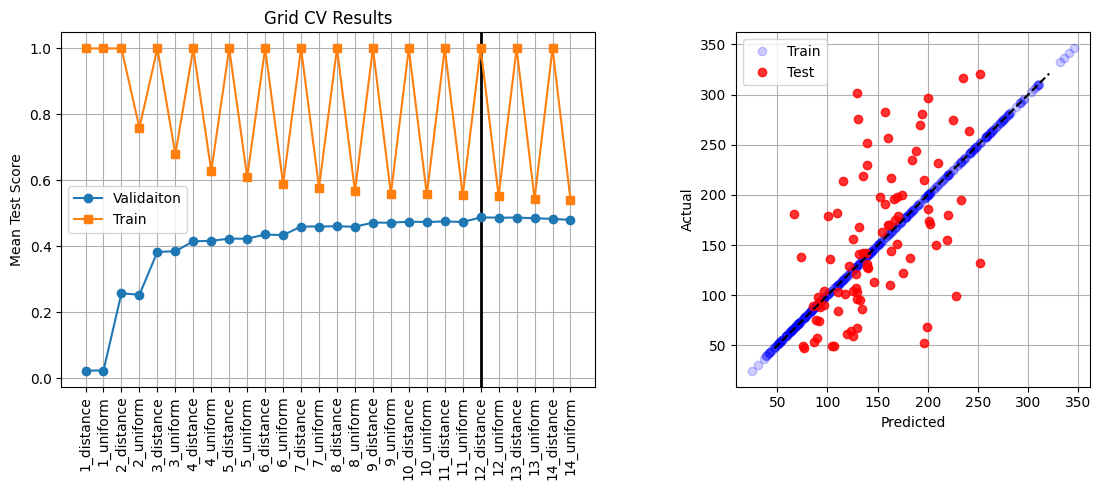

In [78]:
# Define Pipeline
estimators = [('scaler', StandardScaler()), ('reg', KNeighborsRegressor() ) ]
pipe = Pipeline(estimators)

# Grid Search Parameters
params = {'reg__n_neighbors':np.arange(1,15), 'reg__weights':['distance','uniform']}
#params = {'reg__n_neighbors':np.arange(1,21)}  # uniform weighting
print('Grid Parameters:',params)

grid = GridSearchCV(pipe, param_grid=params, return_train_score=True)
grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
print(f"Best Train Score:\t{grid.best_score_:0.3f}")
print(f"Grid Test Score:\t{grid.score(X_test,y_test):0.3f}")

make_grid_plot(grid) # Plot the results

scores['KNeighbors'] = grid.score(X_test,y_test)

Try distance weighting to see how and why the train results are weird

# Gradient Tree Boosting

User's Guide: https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

API: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

Example: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regularization-py

Notes:
* For a small number of samples use GradientBoostingRegressor, for a large number (>10k) use HistGradientBoostingRegressor
* Several options improve performance significantly, tweak options like max_leaf_nodes  

Grid Parameters: {'reg__n_estimators': array([10, 20, 30, 40]), 'reg__subsample': [0.5, 1.0], 'reg__learning_rate': [0.1, 0.2]}
Best parameters: {'reg__learning_rate': 0.1, 'reg__n_estimators': 30, 'reg__subsample': 0.5}
Best Train Score:	0.494
Grid Test Score:	0.323


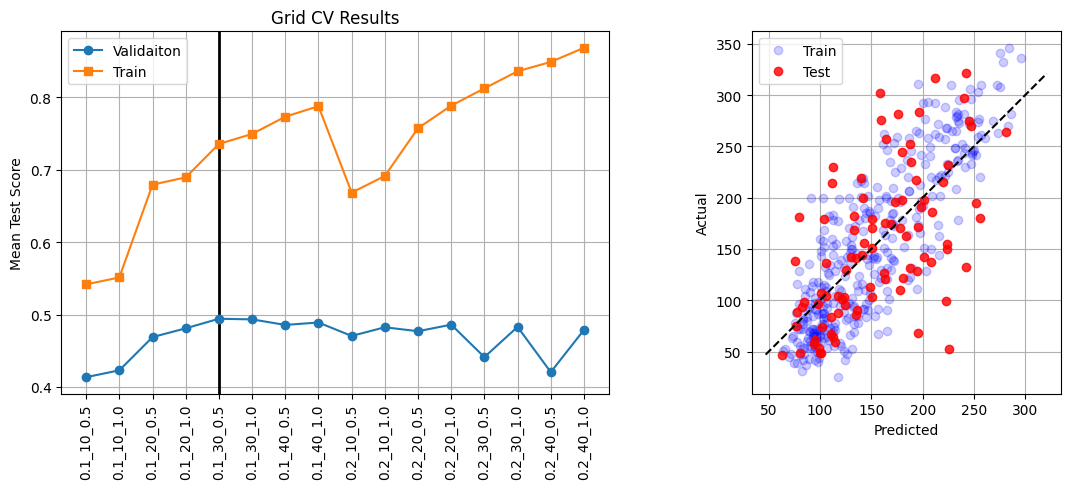

In [100]:
# Define Pipeline
estimators = [('scaler', StandardScaler()), ('reg', GradientBoostingRegressor() ) ]
pipe = Pipeline(estimators)

# Grid Search Parameters
#params = {'reg__n_estimators':np.arange(100,600,100)}
#params = {'reg__n_estimators':np.arange(20,201,20), 'reg__max_depth':[2,3,4]}
#params = {'reg__n_estimators':np.arange(20,201,20), 'reg__max_leaf_nodes':[3,4,5]}
params = {'reg__n_estimators':np.arange(10,41,10), 'reg__subsample':[0.5,1.0], 'reg__learning_rate':[0.1,0.2]}
#params = {'reg__n_estimators':np.arange(20,201,20), 'reg__subsample':[0.5,1.0], 'reg__learning_rate':[0.1,0.2], 'reg__max_leaf_nodes':[3,4,5]}

# subsample = 0.5, 1.0
#learning_rate = 0.1, 0.2
#max_leaf_nodes=k 

print('Grid Parameters:',params)

grid = GridSearchCV(pipe, param_grid=params, return_train_score=True)
grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
print(f"Best Train Score:\t{grid.best_score_:0.3f}")
print(f"Grid Test Score:\t{grid.score(X_test,y_test):0.3f}")

make_grid_plot(grid) # Plot the results

scores['GradientBoost'] = grid.score(X_test,y_test)

### Cross-check

In [88]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
#reg = ensemble.GradientBoostingRegressor(**params)
#reg.fit(X_train, y_train)
estimators = [('scaler', StandardScaler()), ('reg', GradientBoostingRegressor(**params) ) ]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

print(f"Train Score:\t{pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{pipe.score(X_test,y_test):0.3f}")


Train Score:	0.879
Test Score:	0.231


In [111]:
params = {
    "n_estimators": 100,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "subsample":0.5,
}
#reg = ensemble.GradientBoostingRegressor(**params)
#reg.fit(X_train, y_train)
estimators = [('scaler', StandardScaler()), ('reg', GradientBoostingRegressor(**params) ) ]
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

print(f"Train Score:\t{pipe.score(X_train, y_train):0.3f}")
print(f"Test Score:\t{pipe.score(X_test,y_test):0.3f}")


Train Score:	0.529
Test Score:	0.314


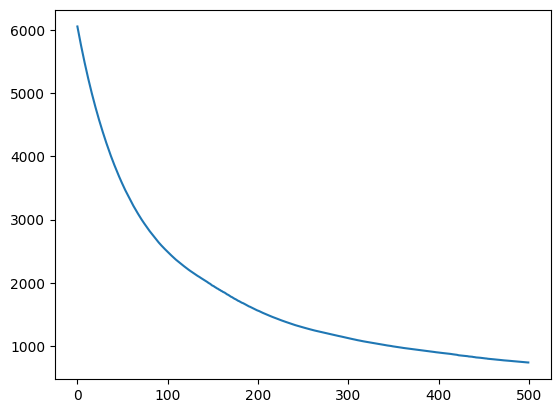

In [89]:
plt.plot(pipe[-1].train_score_)

# Final Summary

In [112]:
print('Test Scores:')
for k,v in scores.items():
  print(f"{k:20}{v:0.3f}")

Test Scores:
LinearRegression    0.332
RidgeCV             0.330
LassoCV             0.330
SVR                 0.332
KNeighbors          0.316
GradientBoost       0.323
